<a href="https://colab.research.google.com/github/Anushka23ja/Anushka23ja/blob/main/MSIS_510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/amandeep0/IS451/main/data/Wine.csv')

In [4]:
# Number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

# Mean value of WinterRain Column
mean_winter_rain = df['WinterRain'].mean()
print(f"Mean of WinterRain column: {mean_winter_rain:.2f}")

# France pop in year 1957
france_pop_1957 = df[df['Year'] == 1957]['FrancePop'].iloc[0]
print(f"France population in year 1957: {france_pop_1957:.2f}")

df

Number of rows in the dataset: 25
Mean of WinterRain column: 605.28
France population in year 1957: 45152.25


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005
8,1962,7.3880,697,16.3000,52,21,48088.673
9,1963,6.7127,608,15.7167,155,20,48798.990


<Axes: xlabel='AGST', ylabel='Price'>

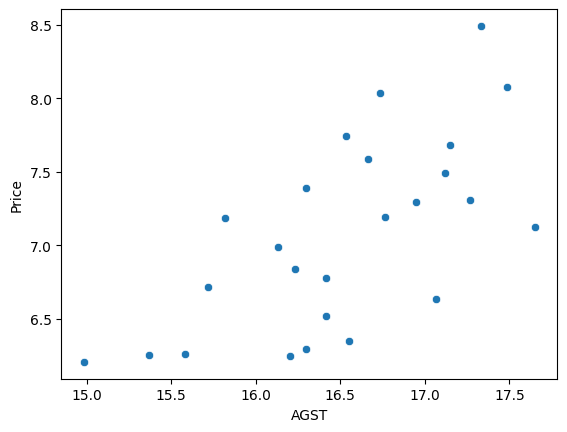

In [5]:
import seaborn as sns
sns.scatterplot(data = df, y='Price', x='AGST')

In [6]:
import statsmodels.formula.api as smf

In [7]:
linear_regression_1 = smf.ols(formula = 'Price ~ AGST', data = df) #ols=ordinary least squares
linear_regression_1_result = linear_regression_1.fit()
print(linear_regression_1_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           0.000335
Time:                        01:37:07   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4178      2.494     -1.371      0.1

In [8]:
df.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [9]:
df_test = pd.read_csv("https://raw.githubusercontent.com/amandeep0/IS451/main/data/WineTest.csv")

In [11]:
linear_regression_multiple = smf.ols(formula = 'Price ~ WinterRain + AGST + HarvestRain + Age + FrancePop', data = df)
linear_regression_multiple_result = linear_regression_multiple.fit()
linear_regression_multiple_result.predict(df_test)

,0
0,6.820462
1,6.751144
